In [1]:
#1

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#2

In [6]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [8]:
 hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [9]:
 hr.shape 

(14999, 10)

In [10]:
print(hr.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [19]:
hr.mode(numeric_only=True)[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0


In [20]:
hr.var()

satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
dtype: float64

In [26]:
 hr.groupby('left').mean()
#Средний уровень удовлетворения работой у тех сотрудников, кто работает в компании, выше, чем у уволившихся работников
#Среднемесячные рабочие часы сотрудников, покинувших компанию, больше, чем у оставшихся сотрудников.
#Сотрудники, у которых были происшествия на работе, с меньшей вероятностью уходят, чем сотрудники, у которых не было происшествий
#Сотрудники, которые были повышены за последние пять лет, с меньшей вероятностью уходят, чем те, кто не получал повышение.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [27]:
 hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [28]:
 hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [22]:
#3

<AxesSubplot:>

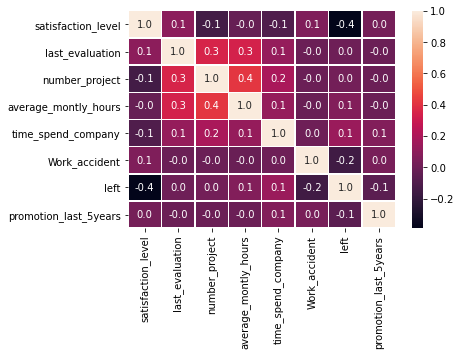

In [24]:
sns.heatmap(hr.corr(), annot=True, linewidths=.5, fmt= '.1f')
#Наиболее скоррелированные переменные: кол-во количество выполненных проектов и среднее количество рабочих часов за месяц (положительная корреляция)
#Также наиболее скоррелированные переменные: dummy переменная, которая определяет уволился ли сотрудник и уровень удовлетворения работой (отрицательная корреляция)
#Наименее скоррелированные переменные: dummy переменная - у сотрудника был несчастный случай на рабочем месте и время работы в компании в годах (нулевая корреляция)
#Также наименее скоррелированные переменные: dummy переменная - у сотрудника был несчастный случай на рабочем месте и кол-во количество выполненных проектов (нулевая корреляция)



sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


<AxesSubplot:title={'center':'Количество сотрудников в департаментах'}, xlabel='Департамент', ylabel='Количество сотрудников'>

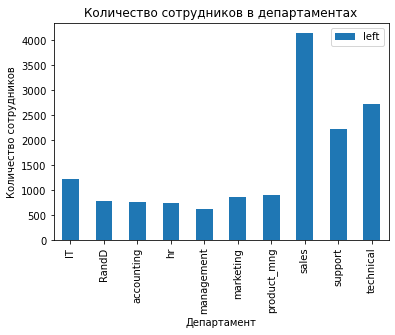

In [69]:
#4
print(hr.department.value_counts())
deps = hr[['left', 'department']].groupby('department').count()
deps.plot(kind='bar',title='Количество сотрудников в департаментах',xlabel='Департамент',ylabel='Количество сотрудников')

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='Зарплата', ylabel='Количество сотрудников'>

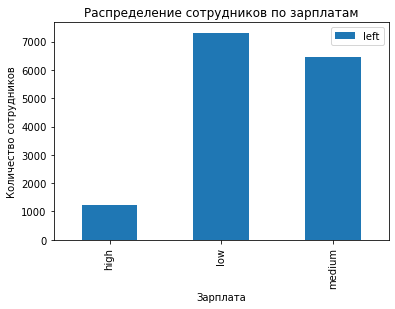

In [66]:
#5
deps = hr[['left', 'salary']].groupby('salary').count()
deps.plot(kind='bar',title='Распределение сотрудников по зарплатам',xlabel='Зарплата',ylabel='Количество сотрудников')
#Больше всего сотрудников с низкой зарплатой :(

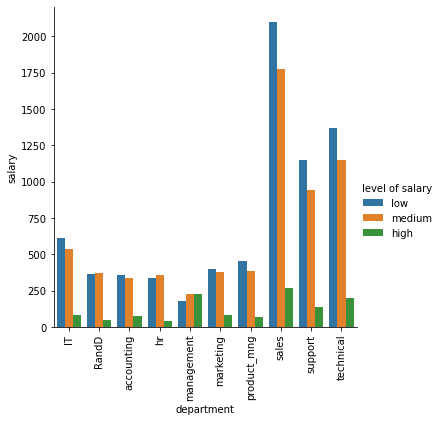

In [157]:
#6
deps_salary = hr.groupby('department')['salary'].value_counts()
deps_salary = pd.DataFrame(deps_salary)
deps_salary.index.names = ["department", "level of salary"]
deps_salary = deps_salary.reset_index()
plot = sns.catplot(x='department', y='salary', hue='level of salary', kind='bar', data=deps_salary)
plt.xticks(rotation=90)
plt.show()

In [161]:
#7
high_salary_hours=hr[hr['salary']=='high']['average_montly_hours']
low_salary_hours=hr[hr['salary']!='high']['average_montly_hours']
from scipy import stats
stats.ttest_ind(high_salary_hours,low_salary_hours)

Ttest_indResult(statistic=-0.8696608762690436, pvalue=0.3844996772979369)

In [180]:
#9
hr_lda = hr.drop(hr.iloc[:, 8:10],axis = 1)
hr_lda.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [182]:
X = hr_lda.drop(['left'], axis=1)
y = hr_lda['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-0.6673884 ,  0.09311738, -0.0326526 ,  0.00070614,  0.0326784 ,
       -0.15361102, -0.16346816])

In [184]:
model.intercept_

0.4747159321930047

In [186]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)
#Очень маленький R2

0.17508752177420428